In [9]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
import sys
import os
pth = os.path.abspath("./../")
sys.path.insert(0, pth)
import teigen

# Create one pill object with radius 10 and length 40

In [11]:
import teigen.measurement
import teigen.tree
import teigen.geometry3d

In [12]:
tb = teigen.tree.TreeBuilder("volume")
radius = 10
length = 40

tb.voxelsize_mm = [1.0, 1.0, 1.0]
tb.shape = [10+radius+radius+length, 10 +  (2 * radius), 25 + (2 * radius)]
pt1 = [5+radius, 5+radius, 20+radius]
pt2 = [5+radius+length, 5+radius, 20+radius]
tb.add_segment_to_tree(pt1, pt2 , radius)
data3d = tb.buildTree()

1.0
<teigen.tb_volume.TBVolume instance at 0x1153dacb0>
<teigen.tb_volume.TBVolume instance at 0x1153dacb0>


# Check one slice

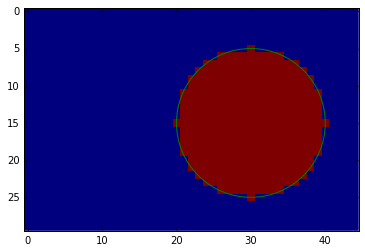

In [13]:
plt.imshow(data3d[30, :, :], interpolation="none")
circle2 = plt.Circle((pt1[2], pt1[1]), radius, color='g', fill=False)
ax = plt.gca()
ax.add_artist(circle2)

In [14]:
print pt1
print pt2

[15, 15, 30]
[55, 15, 30]


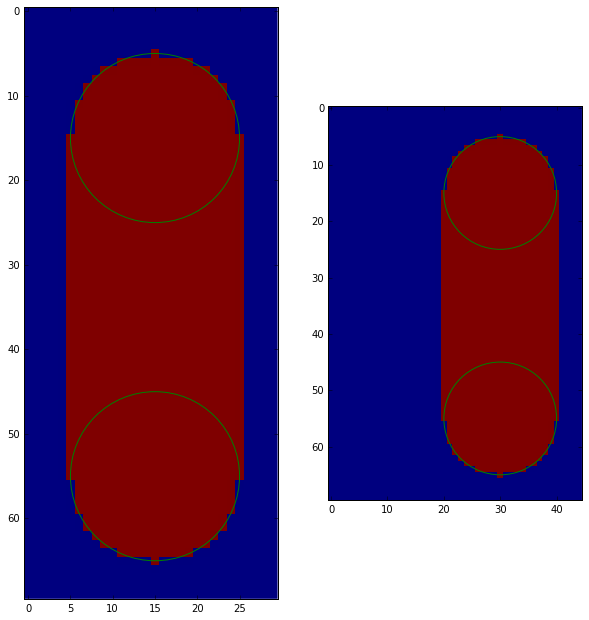

In [15]:
plt.figure(figsize=(10,15))
teigen.geometry3d.show_pill_radiuses(pt1, pt2, radius, data3d)


# Compare analytic and numeric volume

In [16]:
volume_numeric = teigen.measurement.volume_measurement(data3d, [1,1,1])
volume_analytic = teigen.geometry3d.pill_volume(radius, pt1=pt1, pt2=pt2)

print "numeric volume: ", volume_numeric
print "analytic volume: ", volume_analytic
print "err[%]: ", 100 * (volume_numeric - volume_analytic) / volume_analytic

numeric volume:  16849
analytic volume:  16755.1608191
err[%]:  0.560061355825


# Compare analytic and numeric surface

In [17]:
surface_numeric, vertices, faces = teigen.measurement.surface_measurement(
    data3d, [1,1,1], return_vertices_and_faces=True)
surface_analytic = teigen.geometry3d.pill_surface(radius, pt1=pt1, pt2=pt2)

print surface_numeric
print surface_analytic

print "numeric surface: ", surface_numeric
print "analytic surface: ", surface_analytic
print "err[%]: ", 100 * (surface_numeric - surface_analytic) / surface_analytic



4345.23094596
3769.91118431
numeric surface:  4345.23094596
analytic surface:  3769.91118431
err[%]:  15.2608306542


# 3D surface model used for surface measurement

(0, 45)

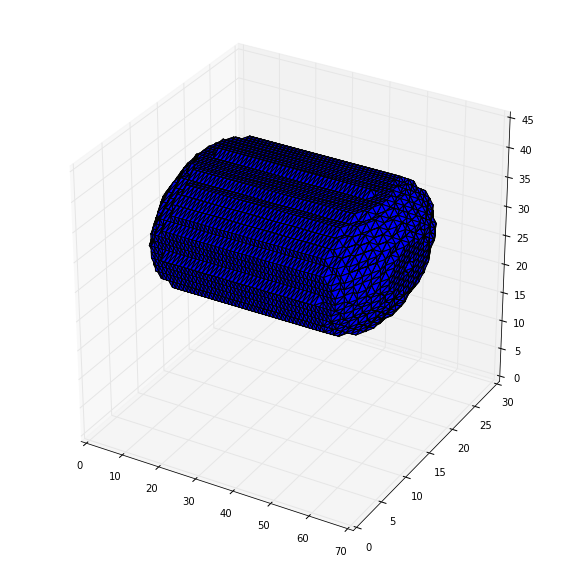

In [18]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)
sh = data3d.shape
ax.set_xlim(0, sh[0])  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, sh[1])  # b = 10
ax.set_zlim(0, sh[2])  # c = 16


# Check analytic surface 

sphere surface: 

$\pi d^2$

pill surface:

$2 \pi r h + 4 \pi r^2 $

In [20]:
# sphere
surface_analytic = teigen.geometry3d.pill_surface(radius=10, length=0)
surface_sphere = np.pi * 20**2

print surface_analytic
print surface_sphere

1256.63706144
1256.63706144


In [22]:
surface_analytic = teigen.geometry3d.pill_surface(radius=10, length=10)
surface_cylinder = 2 * np.pi * 10 * 10

surface_pill = surface_sphere + surface_cylinder

print surface_analytic
print surface_pill

1884.95559215
1884.95559215
